In [516]:
# Author: Muhammad Fathur Rizky
# Date: 2024-12-24
# Email: rizkyfathur326@gmail.com

# **Requirements**

In [517]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy.stats import kstest, shapiro, zscore, norm
import scipy.stats

import warnings
warnings.filterwarnings('ignore')

# **Data Preparation**

In [518]:
data = pd.read_csv('data/Indeks Tolerasi Kota.csv')
gpd_data = gpd.read_file("data/indonesia-geo.json", index_col='ID')
gpd_data.set_index('ID', inplace=True)

In [519]:
city_province = pd.read_csv("data/city_province.csv")
city_province.head()

,City,Province
0,Singkawang,KALIMANTAN BARAT
1,Bekasi,JAWA BARAT
2,Salatiga,JAWA TENGAH
3,Manado,SULAWESI UTARA
4,Semarang,JAWA TENGAH


In [520]:
data = data.merge(city_province, left_on='Kota', right_on='City', how='left')
data.drop(columns=['City'], inplace=True)
data = data.merge(gpd_data, left_on='Province', right_on='Propinsi', how='left')
data.drop(columns=['Propinsi', 'kode', 'SUMBER', 'Jumlah Penduduk'], inplace=True)
data.rename(columns={'Province': 'Provinsi'}, inplace=True)
df = data.copy()

# **Exploratory Data Analysis**

In [521]:
map_df = df[['Skor Akhir', 'Provinsi']].groupby('Provinsi').mean().reset_index().copy()
map_df = map_df.merge(gpd_data, left_on='Provinsi', right_on='Propinsi', how='left')
map_df.drop(columns=['Propinsi', 'kode', 'SUMBER', 'Jumlah Penduduk'], inplace=True)
map_df.rename(columns={'Province': 'Provinsi'}, inplace=True)
map_df.sort_values('Skor Akhir', ascending=False, inplace=True)
map_df.head()

### **Analisis Deskriptif**

In [522]:
tmp = df.copy()
tmp = tmp.drop(columns=[f"Weight{i}" for i in range(1,9)], axis=1)

tmp.describe().loc[['mean', '50%', 'std', 'min', 'max']].T


,mean,50%,std,min,max
IND1,4.226702,4.085,0.910483,2.00,6.5
IND2,6.601596,6.825,0.545285,4.55,7.0
IND3,6.473404,7.000,0.853100,3.50,7.0
IND4,3.787234,4.000,1.105921,1.00,6.0
IND5,4.180851,4.000,1.015607,2.00,6.0
IND6,4.255319,4.000,1.135319,2.00,7.0
IND7,3.744681,4.000,1.076995,2.00,6.0
IND8,3.957447,4.000,1.106335,2.00,6.0
Skor Akhir,5.055755,5.015,0.542382,4.01,6.5


### **Uji Distribusi**

In [523]:
statistic, p_value = kstest(df["Skor Akhir"], 'norm', args=(df["Skor Akhir"].mean(), df["Skor Akhir"].std()))

kolmogorov_smirnov_result = {
    "Statistic": statistic,
    "P-Value": p_value,
    "Normality": "Data follows a normal distribution" if p_value > 0.05 else "Data does not follow a normal distribution"
}

statistic, p_value = shapiro(df["Skor Akhir"])

shapiro_wilk_result = {
    "Statistic": statistic,
    "P-Value": p_value,
    "Normality": "Data follows a normal distribution" if p_value > 0.05 else "Data does not follow a normal distribution"
}

In [524]:
cnt = len(df)
tmp = {
    "Test": ["Kolmogorov-Smirnov", "Shapiro-Wilk"], 
    "Sample": [cnt, cnt],
    "Statistic": [kolmogorov_smirnov_result["Statistic"], shapiro_wilk_result["Statistic"]],
    "P-Value": [kolmogorov_smirnov_result["P-Value"], shapiro_wilk_result["P-Value"]],
    "Normality": [kolmogorov_smirnov_result["Normality"], shapiro_wilk_result["Normality"]]
}
tmp = pd.DataFrame(tmp)
tmp.set_index("Test", inplace=True)
tmp


,Sample,Statistic,P-Value,Normality
Test,,,,
Kolmogorov-Smirnov,94,0.115023,0.153676,Data follows a normal distribution
Shapiro-Wilk,94,0.942809,0.000454,Data does not follow a normal distribution


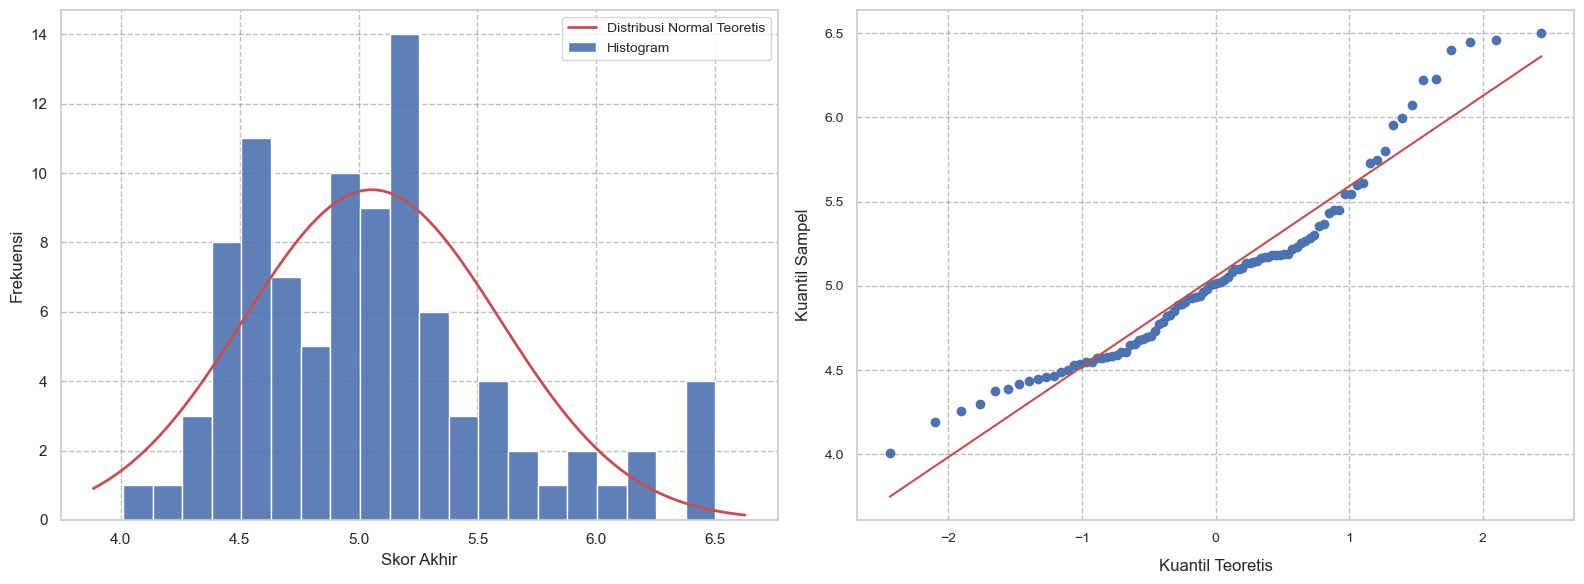

In [549]:
final_scores = df["Skor Akhir"]

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Dua plot dalam satu baris

sns.histplot(final_scores, kde=False, bins=20, label='Histogram', ax=axes[0], alpha=0.9)

mu, std = norm.fit(final_scores)
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

axes[0].plot(x, p * len(final_scores) * (xmax - xmin) / 20, 'r-', label='Distribusi Normal Teoretis', linewidth=2)
axes[0].grid(alpha=0.5, linestyle='--', color='gray')
axes[0].set_xlabel('Skor Akhir', fontsize=12)
axes[0].set_ylabel('Frekuensi', fontsize=12)
axes[0].legend(fontsize=10)

scipy.stats.probplot(final_scores, dist="norm", plot=axes[1])
axes[1].set_title("")  # Mengosongkan judul default
axes[1].set_xlabel("Kuantil Teoretis", fontsize=12, labelpad=10)
axes[1].set_ylabel("Kuantil Sampel", fontsize=12, labelpad=10)
axes[1].grid(alpha=0.5, linestyle='--', color='gray')
axes[1].tick_params(axis='x', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

# Menyesuaikan tata letak
plt.tight_layout()

# Menampilkan plot
plt.show()


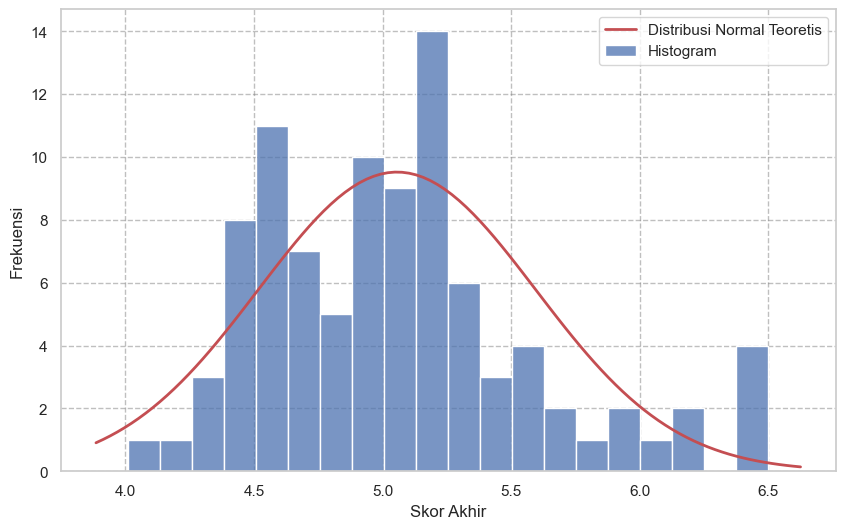

In [ ]:
final_scores = df["Skor Akhir"]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(final_scores, kde=False, bins=20, label='Histogram')

mu, std = norm.fit(final_scores)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.grid(alpha=0.5, linestyle='--', color='gray')

plt.plot(x, p * len(final_scores) * (xmax - xmin) / 20, 'r-', label='Distribusi Normal Teoretis', linewidth=2)

plt.xlabel('Skor Akhir')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

### **Analisis Pencilan**

In [527]:
Q1 = df["Skor Akhir"].quantile(0.25)  # Kuartil pertama
Q3 = df["Skor Akhir"].quantile(0.75)  # Kuartil ketiga
IQR = Q3 - Q1  # Rentang interkuartil

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["Pencilan"] = (df["Skor Akhir"] < lower_bound) | (df["Skor Akhir"] > upper_bound)

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Batas Bawah:", lower_bound)
print("Batas Atas:", upper_bound)
df[df["Pencilan"]]['Kota'].unique().tolist()

Q1: 4.62
Q3: 5.2645
IQR: 0.6444999999999999
Batas Bawah: 3.6532500000000003
Batas Atas: 6.231249999999999


['Singkawang', 'Bekasi', 'Salatiga', 'Manado']

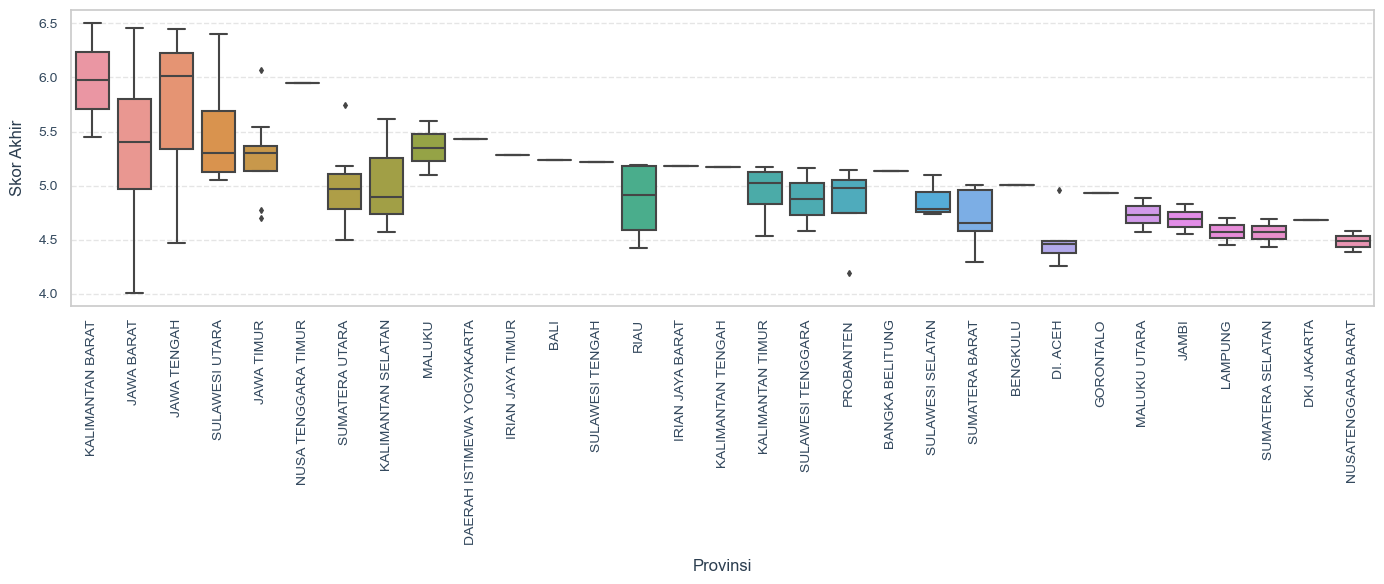

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(14, 6))
sns.boxplot(x='Provinsi', y='Skor Akhir', data=df, linewidth=1.5, fliersize=3, whis=1.5)

plt.xlabel('Provinsi', fontsize=12, labelpad=10, color='#2c3e50')
plt.ylabel('Skor Akhir', fontsize=12, labelpad=10, color='#2c3e50')
plt.xticks(rotation=90, fontsize=10, color='#34495e')
plt.yticks(fontsize=10, color='#34495e')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [529]:
df["Z-Score"] = zscore(df["Skor Akhir"])
df["Pencilan"] = (df["Z-Score"] < -3) | (df["Z-Score"] > 3)
df[df["Pencilan"]]['Kota'].unique().tolist()

[]

### **Analisis Korelasi**

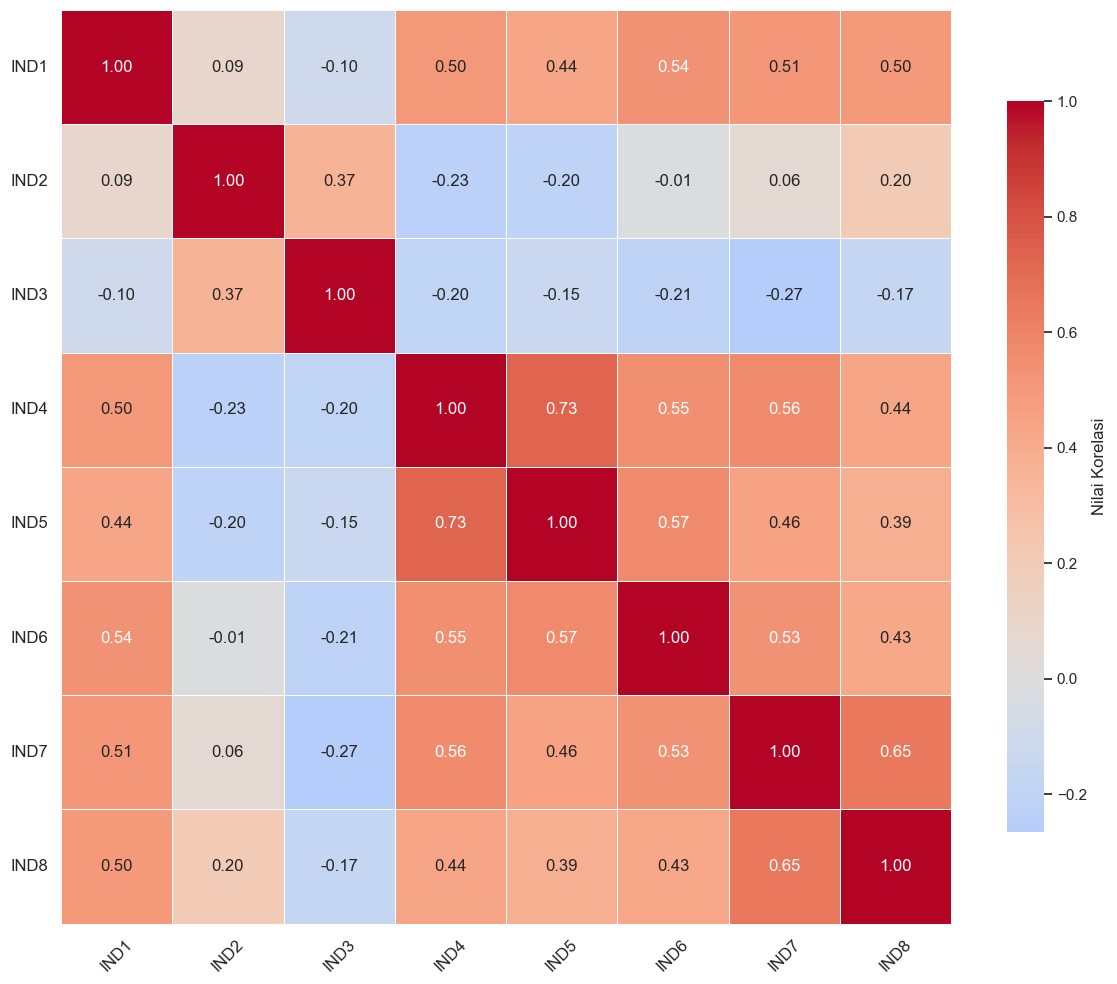

In [530]:
import seaborn as sns
import matplotlib.pyplot as plt

tmp = df[[f"IND{i}" for i in range(1, 9)]].copy()

plt.figure(figsize=(12, 10))  
heatmap = sns.heatmap(
    tmp.corr(method='spearman'),
    annot=True,              # Menampilkan nilai korelasi
    fmt=".2f",               # Format angka korelasi
    cmap='coolwarm',         # Palet warna
    center=0,                # Pusatkan warna pada nol
    linewidths=0.5,          # Menambahkan garis batas antar sel
    cbar_kws={'shrink': 0.8, 'label': 'Nilai Korelasi'}  
)


plt.xticks(fontsize=12, rotation=45)  
plt.yticks(fontsize=12, rotation=0)   
plt.tight_layout()                    
plt.show()


### **Province Tolerance Level Map Viz (Skor Akhir)**

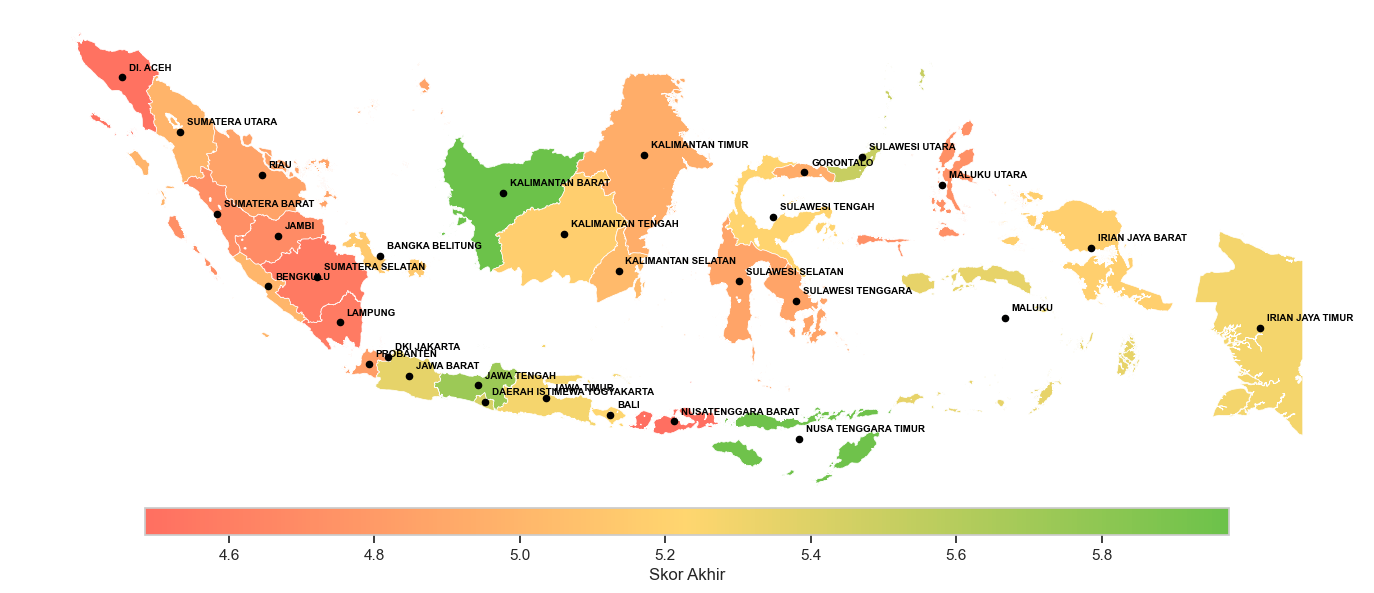

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import geopandas as gpd

fig, ax = plt.subplots(figsize=(14, 14))  
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#ff6f61", "#ffd66f", "#6cc24a"])  # Warna lebih lembut

# Plot peta
map_df = gpd.GeoDataFrame(map_df, geometry='geometry')  # Pastikan GeoDataFrame
map_df.plot(
    column='Skor Akhir',
    cmap=cmap,
    legend=True,
    legend_kwds={
        'label': "Skor Akhir",
        'orientation': "horizontal",
        'shrink': 0.8,
        'aspect': 40,
        'pad': 0,
    },
    ax=ax,
    edgecolor='white',
    linewidth=0.5  # Garis batas antar wilayah
)

centroids = map_df.geometry.centroid
ax.scatter(
    centroids.x,
    centroids.y,
    color='black',
    s=20,
    zorder=5,
    label='Centroid'  
)

for idx, row in map_df.iterrows():
    ax.annotate(
        text=row['Provinsi'],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        xytext=(5, 5),  # Offset teks untuk menghindari overlap
        textcoords='offset points',
        fontsize=7,  # Ukuran font annotasi
        color='black',
        weight='bold' 
    )

plt.axis('off') 
ax.set_facecolor('none') 
fig.patch.set_facecolor('white')  
plt.tight_layout()
plt.show()


In [558]:
map_df = df[['IND1', 'IND2', 'Provinsi']].groupby('Provinsi').mean().reset_index().copy()
map_df = map_df.merge(gpd_data, left_on='Provinsi', right_on='Propinsi', how='left')
map_df.drop(columns=['Propinsi', 'kode', 'SUMBER', 'Jumlah Penduduk'], inplace=True)
map_df.rename(columns={'Province': 'Provinsi'}, inplace=True)
map_df.sort_values('IND1', ascending=False, inplace=True)
map_df.head()

,Provinsi,IND1,IND2,geometry
5,DKI JAKARTA,5.50,6.400000,"MULTIPOLYGON (((106.72134 -6.09, 106.72354 -6...."
11,JAWA TENGAH,5.39,6.933333,"MULTIPOLYGON (((108.82934 -6.74608, 108.8306 -..."
20,NUSA TENGGARA TIMUR,5.33,6.850000,"MULTIPOLYGON (((122.6195 -8.40327, 122.6208 -8..."
13,KALIMANTAN BARAT,5.25,7.000000,"MULTIPOLYGON (((114.20497 1.40754, 114.20126 1..."
10,JAWA BARAT,4.98,6.225000,"MULTIPOLYGON (((106.3961 -6.9798, 106.39306 -6..."


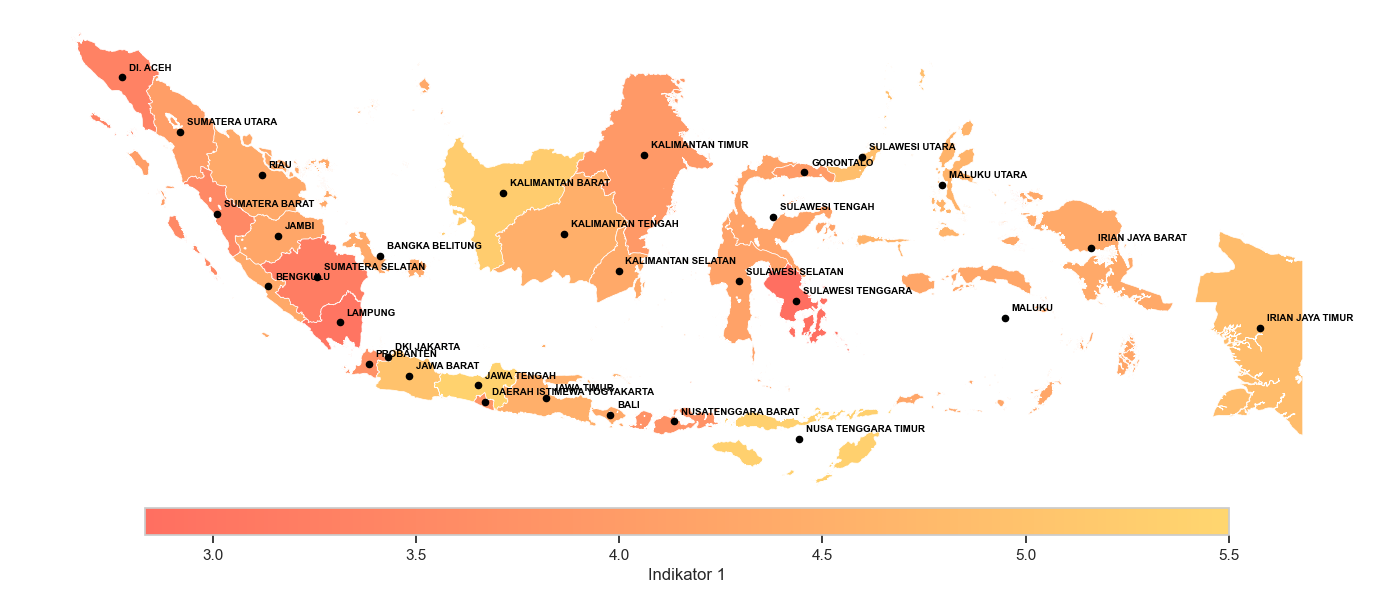

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import geopandas as gpd

fig, ax = plt.subplots(figsize=(14, 14))  
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#ff6f61", "#ffd66f"])

map_df = gpd.GeoDataFrame(map_df, geometry='geometry')  
map_df.plot(
    column='IND1',
    cmap=cmap,
    legend=True,
    legend_kwds={
        'label': "Indikator 1",
        'orientation': "horizontal",
        'shrink': 0.8,
        'aspect': 40,
        'pad': 0,
    },
    ax=ax,
    edgecolor='white',
    linewidth=0.5  # Garis batas antar wilayah
)

centroids = map_df.geometry.centroid
ax.scatter(
    centroids.x,
    centroids.y,
    color='black',
    s=20,
    zorder=5,
    label='Centroid'  # Opsional: Menambahkan label untuk titik centroid
)

for idx, row in map_df.iterrows():
    ax.annotate(
        text=row['Provinsi'],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        xytext=(5, 5),  # Offset teks untuk menghindari overlap
        textcoords='offset points',
        fontsize=7,  # Ukuran font annotasi
        color='black',
        weight='bold'  # Menonjolkan teks
    )

plt.axis('off') 
ax.set_facecolor('none')  
fig.patch.set_facecolor('white')  

plt.tight_layout()
plt.show()


In [532]:
rata_rata_nasional = pd.read_json('data/rata_rata_nasional.json')
rata_rata_nasional.set_index('tahun', inplace=True)

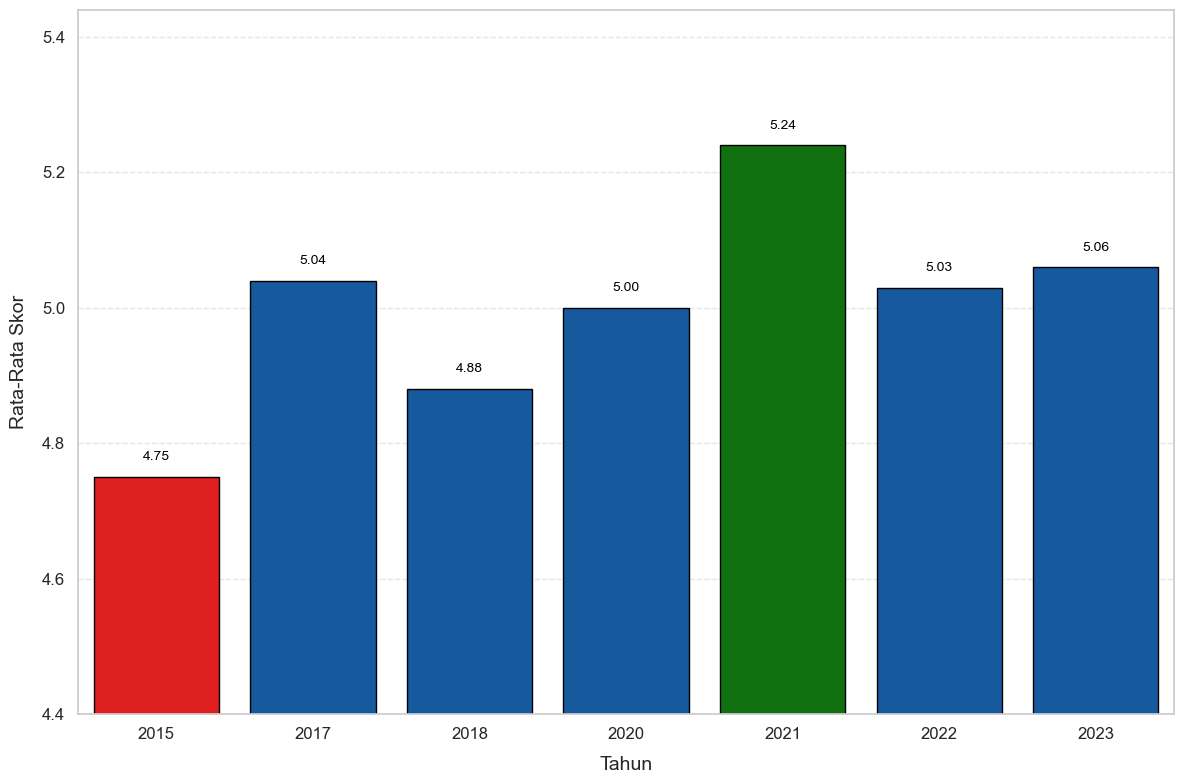

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

base_color = "#0059b3"
highlight_colors = {2015: "red", 2021: "green"}
colors = [highlight_colors.get(year, base_color) for year in rata_rata_nasional.index]

plt.figure(figsize=(12, 8))  
ax = sns.barplot(
    data=rata_rata_nasional,
    x=rata_rata_nasional.index,
    y=rata_rata_nasional["rata_rata"],
    palette=colors,
    edgecolor="black"
)

for i, (year, rata_rata) in enumerate(rata_rata_nasional.iterrows()):
    ax.text(
        i, 
        rata_rata["rata_rata"] + 0.02,  
        f'{rata_rata["rata_rata"]:.2f}', 
        ha='center', 
        va='bottom',
        fontsize=10,
        color='black',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="none", facecolor="white", alpha=0.7)
    )

plt.ylim(4.4, max(rata_rata_nasional["rata_rata"]) + 0.2)  # Tambahkan margin atas
plt.xlabel('Tahun', fontsize=14, labelpad=10)
plt.ylabel('Rata-Rata Skor', fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
